This 

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import seaborn as sns
from keras.models import load_model

In [12]:
os.listdir('../Retail-Product-Recognition/archive (1)/retail_product_checkout/Data')

['alcohol',
 'candy',
 'canned_food',
 'chocolate',
 'dessert',
 'dried_food',
 'dried_fruit',
 'drink',
 'gum',
 'instant_drink',
 'instant_noodles',
 'milk',
 'personal_hygiene',
 'puffed_food',
 'seasoner',
 'stationery',
 'tissue']

### Now we will create a function to convert images into arrays

In [8]:
X = []
y = []

In [9]:
def convert(path):
        cat = 0
        for p in os.listdir(path):
            new = os.path.join(path,p)
            for i in os.listdir(new):
                img_array = cv2.imread(os.path.join(new,i),cv2.IMREAD_GRAYSCALE)
                new_img_array = cv2.resize(img_array, dsize=(80, 80))
                X.append(new_img_array)
                y.append(cat) 
            cat = cat + 1
            
       

In [11]:
convert('../Retail-Product-Recognition/archive (1)/retail_product_checkout/Data')

C:\Users\Harsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

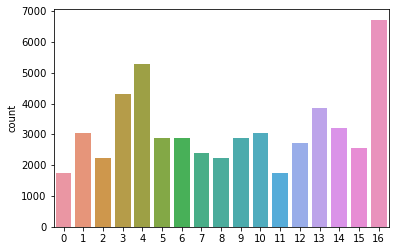

In [18]:
sns.countplot(y)

In [19]:
from imblearn.over_sampling import SMOTE

In [15]:
t = set(y)
t

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}

In [34]:
len(y)

53738

In [22]:
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

In [40]:
X.shape

(53738, 80, 80, 1)

Normalize the data

In [23]:
X = X/255

In [41]:
X = np.array(X).reshape(-1,6400)

In [42]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [43]:
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

C:\Users\Harsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

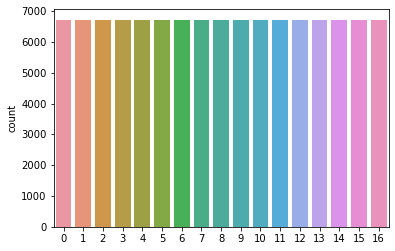

In [44]:
sns.countplot(y)

In [45]:
len(X)

114223

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [49]:
len(X_train)

91378

In [41]:
model = Sequential()
# Adds a densely-connected layer with 64 units to the model:
model.add(Conv2D(64,(3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
# Add another:
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
# Add a softmax layer with 10 output units:
model.add(Dense(17, activation='softmax'))

In [42]:
model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [43]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1075/1075 [==============================] - 327s 303ms/step - loss: 1.4123 - accuracy: 0.5242 - val_loss: 0.7880 - val_accuracy: 0.7235
Epoch 2/10
1075/1075 [==============================] - 327s 304ms/step - loss: 0.5599 - accuracy: 0.8001 - val_loss: 0.4637 - val_accuracy: 0.8302
Epoch 3/10
1075/1075 [==============================] - 365s 340ms/step - loss: 0.3308 - accuracy: 0.8836 - val_loss: 0.2911 - val_accuracy: 0.8926
Epoch 4/10
1075/1075 [==============================] - 346s 322ms/step - loss: 0.2181 - accuracy: 0.9217 - val_loss: 0.2176 - val_accuracy: 0.9229
Epoch 5/10
1075/1075 [==============================] - 340s 317ms/step - loss: 0.1566 - accuracy: 0.9460 - val_loss: 0.2119 - val_accuracy: 0.9261
Epoch 6/10
1075/1075 [==============================] - 370s 344ms/step - loss: 0.1225 - accuracy: 0.9574 - val_loss: 0.1758 - val_accuracy: 0.9367
Epoch 7/10
1075/1075 [==============================] - 332s 309ms/step - loss: 0.0958 - accuracy: 0.9678 - val_

In [44]:
prediction = model.predict(X_test)


In [68]:
results = np.argmax(prediction,axis=1)

In [71]:
print("model accuracy score: ", accuracy_score(y_test, results))

model accuracy score:  0.9095645701525865


In [79]:
print('F1 score: ', f1_score(y_test,results, average='macro'))

F1 score:  0.9021954238704862


In [80]:
model.save('model.h5')

In [47]:
model = load_model("model.h5")

In [50]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2285/2285 [==============================] - 718s 307ms/step - loss: 0.0748 - accuracy: 0.9759 - val_loss: 0.0696 - val_accuracy: 0.9767
Epoch 2/10
2285/2285 [==============================] - 685s 300ms/step - loss: 0.0489 - accuracy: 0.9839 - val_loss: 0.0576 - val_accuracy: 0.9813
Epoch 3/10
2285/2285 [==============================] - 685s 300ms/step - loss: 0.0392 - accuracy: 0.9869 - val_loss: 0.0522 - val_accuracy: 0.9834
Epoch 4/10
2285/2285 [==============================] - 673s 295ms/step - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0531 - val_accuracy: 0.9841
Epoch 5/10
2285/2285 [==============================] - 669s 293ms/step - loss: 0.0292 - accuracy: 0.9904 - val_loss: 0.0501 - val_accuracy: 0.9838
Epoch 6/10
2285/2285 [==============================] - 666s 292ms/step - loss: 0.0265 - accuracy: 0.9915 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch 7/10
2285/2285 [==============================] - 666s 291ms/step - loss: 0.0227 - accuracy: 0.9930 - val_

In [51]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

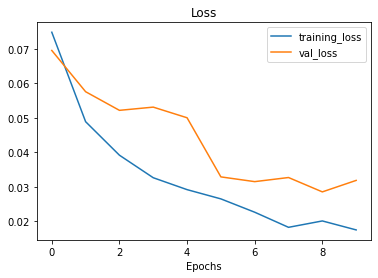

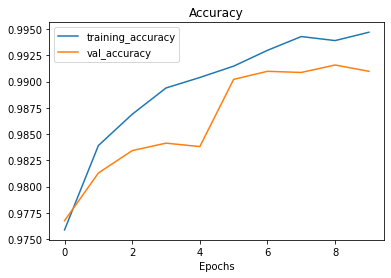

In [52]:
plot_loss_curves(history)